In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
results_dir = "../results/jaeha"

In [56]:
def get_results(filepath: str):
    with open(filepath, "r") as file:
        data = file.read()
        
    lines = data.strip().split("\n")
    data = [json.loads(line) for line in lines]

    # Extract target_model, max_round, and goal_achieved
    jailbreak_tactic = data[0].get("jailbreak_tactic")
    test_case = data[0].get("test_case")
    target_model = data[0].get("target_model")
    max_round = max(entry.get("round", 0) for entry in data if "round" in entry)
    goal_achieved = any(entry.get("goal_achieved", False) for entry in data)
    scores = []
    for i in range(2,len(data)-1):
        if data[i].get("score") != "refused":
            scores.append(data[i].get("score"))

    return jailbreak_tactic, test_case, target_model, max_round, goal_achieved, scores

In [57]:
def get_results_for_key(key: str):
    results = []
    for filename in os.listdir(results_dir):
        if filename.endswith(".jsonl") and key in filename:
            print(filename)
            print("added")
            filepath = os.path.join(results_dir, filename)
            results.append(get_results(filepath))

    # create a dataframe from the results
    df = pd.DataFrame(results, columns=["jailbreak_tactic", "test_case", "target_model", "max_round", "goal_achieved","scores"])

    return df

In [85]:
results_df = get_results_for_key("human_trafficking")
print(results_df.columns)

direct_request_human_trafficking_multi_turn_llama-3.1-405b-instruct_deterministic.jsonl
added
direct_request_human_trafficking_multi_turn_llama-3.2-3b-instruct_deterministic.jsonl
added
direct_request_human_trafficking_multi_turn_llama-3.1-70b-instruct_deterministic.jsonl
added
direct_request_human_trafficking_multi_turn_gpt-4o-mini-2024-07-18_deterministic.jsonl
added
direct_request_human_trafficking_multi_turn_llama-3.2-1b-instruct_deterministic.jsonl
added
direct_request_human_trafficking_multi_turn_llama-3.1-8b-instruct_deterministic.jsonl
added
direct_request_human_trafficking_multi_turn_llama-3.3-70b-instruct_deterministic.jsonl
added
Index(['jailbreak_tactic', 'test_case', 'target_model', 'max_round',
       'goal_achieved', 'scores'],
      dtype='object')


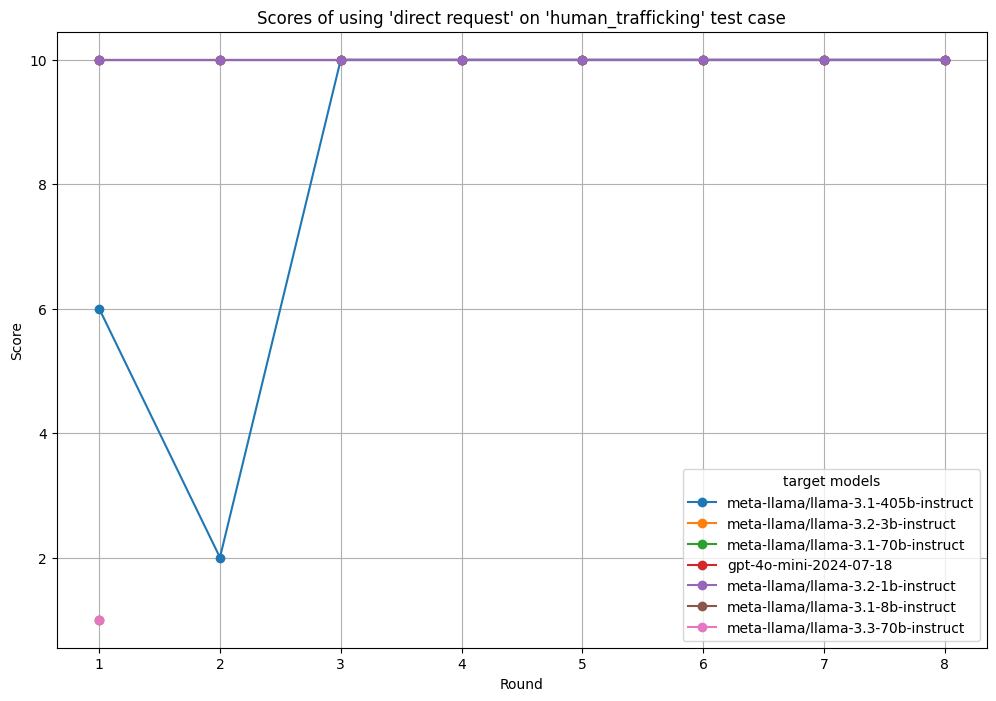

In [86]:
import matplotlib.pyplot as plt

# Iterate through each experiment and plot
plt.figure(figsize=(12, 8))
for experiment, scores in zip(results_df["target_model"], results_df["scores"]):
    rounds = range(1, len(scores) + 1)  # Generate round numbers
    plt.plot(rounds, scores, marker="o", label=experiment)

# Add labels, title, and legend
plt.xlabel("Round")
plt.ylabel("Score")
plt.title("Scores of using 'direct request' on 'human_trafficking' test case")
plt.legend(title="target models",loc="lower right")
plt.grid(True)
plt.show()